In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import astropy
from astropy.io import fits
from astropy import cosmology
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
cosmo = FlatLambdaCDM(H0=100. * u.km / u.s / u.Mpc, Om0=0.31)
from calc_kcor import*
c = 299792.458

In [2]:
fuji_pv = pd.read_csv("fuji_pv_new.csv")
fuji_pv

,#fibermap_targetid,fibermap_i,ra_1,dec_1,targetid,id,healpix,survey,program,targetid.1,...,pv,pverr,zp,zhd,idx,d2d,logdist_corr,logdist_err_corr,pv_corr,pverr_corr
0,39628417112478213,400,192.260477,26.893112,39628417112478213,1301,28148,sv1,bright,39628417112478213,...,715.900844,1769.034190,-0.001541,0.027153,6192,0.149657,0.029889,0.100890,524.165632,1769.285380
1,39628417133447721,426,193.579225,27.068031,39628417133447721,1304,28149,sv1,bright,39628417133447721,...,3630.261093,1979.890546,-0.001604,0.030405,33995,0.020194,0.173326,0.100507,3414.854109,1980.173823
2,39627769709071900,191,184.913600,-0.750861,39627769709071900,1516,26254,sv1,bright,39627769709071900,...,-2132.960665,2159.343503,-0.000654,0.031779,3391,0.000032,-0.111073,0.101393,-2365.838643,2159.647080
3,39633076111803113,63,119.188267,39.927879,39633076111803113,996,6541,sv1,bright,39633076111803113,...,20.932642,939.867093,-0.000137,0.013181,21262,0.237557,-0.008601,0.104740,-77.188733,939.990915
4,39628422523128777,203,193.922076,27.250763,39628422523128777,1304,28149,sv1,bright,39628422523128777,...,-1099.996339,1707.819657,-0.000073,0.024700,32909,0.000008,-0.076048,0.101109,-1284.695449,1708.061104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4186,39632986789905375,570,252.485796,35.198279,39632986789905375,3347,9429,sv3,bright,39632986789905375,...,1567.827904,12315.564270,-0.000143,0.099817,12827,0.013831,0.012563,0.184578,838.296840,12316.086652
4187,39627652587330772,44,36.125245,-5.566223,39627652587330772,933,17683,sv1,bright,39627652587330772,...,-1610.026917,3494.709956,-0.000894,0.045573,7941,80.027029,-0.063812,0.114791,-1942.917085,3495.093250
4188,39627628545578443,30,36.097224,-6.412998,39627628545578443,922,17680,sv1,bright,39627628545578443,...,-5257.334901,4004.290864,-0.000183,0.049973,7038,80.393518,-0.166009,0.118127,-5627.991997,4004.705590
4189,39633307725466372,337,173.525018,53.919783,39633307725466372,2657,5976,sv2,bright,39633307725466372,...,-11674.944029,9768.632841,-0.000250,0.072290,25868,0.278661,-0.250681,0.200608,-12207.362099,9768.983616


In [3]:
# fuji_pv = fuji_pv.drop(fuji_pv[fuji_pv["flag"] == 0].index)
# fuji_pv

In [4]:
fuji_pv.columns.values

array(['#fibermap_targetid', 'fibermap_i', 'ra_1', 'dec_1', 'targetid',
       'id', 'healpix', 'survey', 'program', 'targetid.1', 'z_x', 'zerr',
       'zwarn', 'spectype', 'subtype', 'deltachi2', 'healpix_id',
       'targetid.2', 'target_ra', 'target_dec', 'obsconditions',
       'release', 'brickid_1', 'brick_objid', 'fiberflux_ivar_g',
       'fiberflux_ivar_r', 'fiberflux_ivar_z', 'morphtype', 'flux_g',
       'flux_r', 'flux_z', 'flux_ivar_g', 'flux_ivar_r', 'flux_ivar_z',
       'ebv', 'flux_w1', 'flux_w2', 'flux_ivar_w1', 'flux_ivar_w2',
       'fiberflux_g', 'fiberflux_r', 'fiberflux_z', 'fibertotflux_g',
       'fibertotflux_r', 'fibertotflux_z', 'sersic_1', 'coadd_numexp',
       'coadd_exptime', 'coadd_numnight', 'coadd_numtile', 'healpix_id.1',
       'objid_1', 'brickid.1', 'brickname_1', 'ra.1', 'dec.1',
       'ppxf_sigma', 'ppxf_sigma_error', 'DER_SNR', 'snr_ppxf', 'OBJID_2',
       'BRICKID_2', 'BRICKNAME_2', 'RA_2', 'DEC_2', 'TYPE', 'SERSIC_2',
       'Z_PHOT_MEDIAN

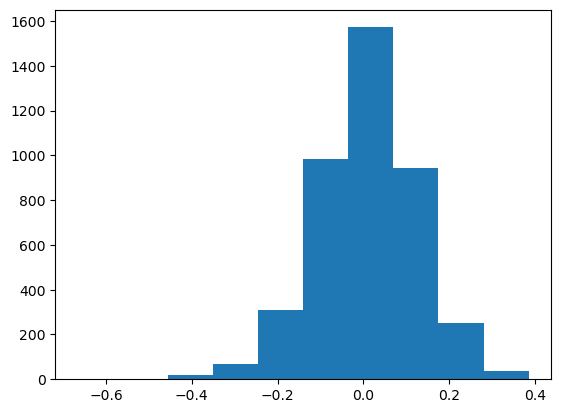

In [5]:
plt.hist(fuji_pv["logdist_corr"])
plt.show()

In [6]:
# hdu = fits.open('./Coma_chris/coma_filtered_inturnaround_desi.fits')
# t = hdu[1].data
# target_id = t['target_id']
# target_id

In [7]:
coma_desi = pd.read_csv("./Coma_chris/coma_all.csv")
coma_desi

,target_id,sdss_id,ra,dec,z,z_err,spectype,survey,program,MASKBITS,...,lum_r,lum_z,in_desi,in_sdss,coma_fof,stillinsample,in_turnaround,delta_R,delta_v,vel
0,39628438616676024,0,194.95247,27.982782,0.017865,0.000071,GALAXY,sv3,bright,0,...,5.415526e+08,6.438666e+08,True,False,True,True,True,0.003814,-1609.34470,5307.9717
1,39628438616675858,1237667444048658525,194.94493,27.973840,0.031485,0.000012,GALAXY,sv3,bright,4096,...,1.492407e+10,2.261809e+10,True,True,True,True,True,0.016424,2375.38800,9290.3710
2,39628438616675869,1237667324334571832,194.94559,27.991917,0.027993,0.000047,GALAXY,sv3,bright,0,...,8.298975e+08,1.117166e+09,True,True,True,True,True,0.022059,1358.70360,8274.5230
3,39628438616675853,0,194.94467,28.000118,0.020665,0.000057,GALAXY,sv3,bright,0,...,5.324131e+08,6.815519e+08,True,False,True,True,True,0.035221,-785.92440,6131.1187
4,39628438616676526,0,194.97472,27.970484,0.022671,0.000039,GALAXY,sv3,bright,0,...,6.044809e+08,8.308895e+08,True,False,True,True,True,0.036667,-197.14447,6719.6430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1691,39628422497961446,1237667323259781256,192.15393,27.366423,0.026639,0.000005,GALAXY,sv1,bright,0,...,1.049079e+09,1.314343e+09,True,True,True,True,True,4.311669,963.87310,7879.9697
1692,39628417112476991,0,192.20111,27.035795,0.021341,0.000006,GALAXY,sv1,bright,6144,...,1.078935e+10,1.499522e+10,True,False,True,True,True,4.418866,-587.41345,6329.5303
1693,0,1237665441516879941,197.69800,28.995218,0.025010,0.000018,NaN,NaN,NaN,0,...,9.811587e+08,8.940419e+08,False,True,True,True,True,4.419212,487.53052,7403.9380
1694,39628417112478213,1237667322722975777,192.26048,26.893112,0.024620,0.000003,GALAXY,sv1,bright,4096,...,1.147318e+10,1.722939e+10,True,True,True,True,True,4.432741,373.55045,7290.0117


In [8]:
coma_desi.columns.values

array(['target_id', 'sdss_id', 'ra', 'dec', 'z', 'z_err', 'spectype',
       'survey', 'program', 'MASKBITS', 'BRICKNAME', 'BRICKID',
       'BRICK_OBJID', 'PHOTSYS', 'HEALPIX', 'mag_app_g', 'mag_app_r',
       'mag_app_z', 'mag_err_g', 'mag_err_r', 'mag_err_z', 'mag_abs_g',
       'mag_abs_r', 'mag_abs_z', 'lum_g', 'lum_r', 'lum_z', 'in_desi',
       'in_sdss', 'coma_fof', 'stillinsample', 'in_turnaround', 'delta_R',
       'delta_v', 'vel'], dtype=object)

In [9]:
coma_merged = pd.merge(fuji_pv, coma_desi, left_on='targetid', right_on='target_id')

In [10]:
coma_merged

,#fibermap_targetid,fibermap_i,ra_1,dec_1,targetid,id,healpix,survey_x,program_x,targetid.1,...,lum_r,lum_z,in_desi,in_sdss,coma_fof,stillinsample,in_turnaround,delta_R,delta_v,vel
0,39628417112478213,400,192.260477,26.893112,39628417112478213,1301,28148,sv1,bright,39628417112478213,...,1.147318e+10,1.722939e+10,True,True,True,True,True,4.432741,373.55045,7290.0117
1,39628417133447721,426,193.579225,27.068031,39628417133447721,1304,28149,sv1,bright,39628417133447721,...,9.881991e+10,1.523824e+11,True,False,True,True,True,2.568768,1306.08560,8221.9330
2,39628422523128777,203,193.922076,27.250763,39628422523128777,1304,28149,sv1,bright,39628422523128777,...,2.967021e+10,4.544369e+10,True,True,True,True,True,1.972953,93.80087,7010.4140
3,39628438608283113,309,194.221420,27.929491,39628438608283113,1267,10400,sv1,bright,39628438608283113,...,7.237596e+09,1.118884e+10,True,True,True,True,True,1.093673,-833.89276,6083.1720
4,39628443939243735,11,193.999798,28.186935,39628443939243735,1267,10400,sv1,bright,39628443939243735,...,4.648998e+09,6.833008e+09,True,True,True,True,True,1.461050,-1374.13450,5543.1180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,39628417133449045,156,193.653392,26.934850,39628417133449045,3418,28149,sv3,bright,39628417133449045,...,1.670891e+10,2.352247e+10,True,True,True,True,True,2.627162,-1029.60790,5887.5180
228,39628427917002028,2564,195.255573,27.520443,39628427917002028,3176,10379,sv3,bright,39628427917002028,...,9.075618e+08,1.209687e+09,True,False,True,True,True,0.898336,1387.40470,8303.1770
229,39628433268934585,1824,194.778574,27.772473,39628433268934585,3174,10378,sv3,bright,39628433268934585,...,1.571733e+09,2.175264e+09,True,True,True,True,True,0.436897,-736.10370,6180.9175
230,39628400918267151,611,194.531436,26.326807,39628400918267151,3410,28125,sv3,bright,39628400918267151,...,5.526689e+09,8.056989e+09,True,True,True,True,True,2.862043,-1268.31690,5648.9140


In [11]:
coma_merged.columns.values

array(['#fibermap_targetid', 'fibermap_i', 'ra_1', 'dec_1', 'targetid',
       'id', 'healpix', 'survey_x', 'program_x', 'targetid.1', 'z_x',
       'zerr', 'zwarn', 'spectype_x', 'subtype', 'deltachi2',
       'healpix_id', 'targetid.2', 'target_ra', 'target_dec',
       'obsconditions', 'release', 'brickid_1', 'brick_objid',
       'fiberflux_ivar_g', 'fiberflux_ivar_r', 'fiberflux_ivar_z',
       'morphtype', 'flux_g', 'flux_r', 'flux_z', 'flux_ivar_g',
       'flux_ivar_r', 'flux_ivar_z', 'ebv', 'flux_w1', 'flux_w2',
       'flux_ivar_w1', 'flux_ivar_w2', 'fiberflux_g', 'fiberflux_r',
       'fiberflux_z', 'fibertotflux_g', 'fibertotflux_r',
       'fibertotflux_z', 'sersic_1', 'coadd_numexp', 'coadd_exptime',
       'coadd_numnight', 'coadd_numtile', 'healpix_id.1', 'objid_1',
       'brickid.1', 'brickname_1', 'ra.1', 'dec.1', 'ppxf_sigma',
       'ppxf_sigma_error', 'DER_SNR', 'snr_ppxf', 'OBJID_2', 'BRICKID_2',
       'BRICKNAME_2', 'RA_2', 'DEC_2', 'TYPE', 'SERSIC_2',
       '

In [12]:
coma_merged.to_csv('coma_merged_new.csv', index=False, header=True)

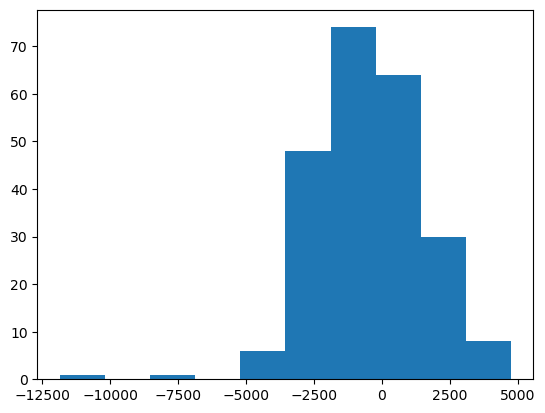

In [13]:
plt.hist(coma_merged.pv)
plt.show()

In [14]:
w_pv = 1./coma_merged.pverr**2
print(np.average(coma_merged.pv,weights=w_pv))

-678.0735487144295


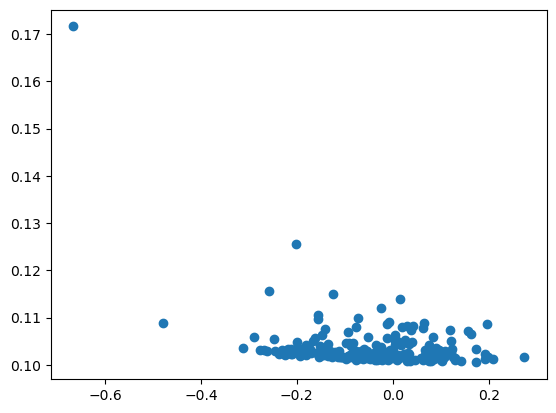

In [15]:
plt.scatter(coma_merged.logdist_corr,coma_merged.logdist_err_corr)
plt.show()

In [16]:
coma_merged

,#fibermap_targetid,fibermap_i,ra_1,dec_1,targetid,id,healpix,survey_x,program_x,targetid.1,...,lum_r,lum_z,in_desi,in_sdss,coma_fof,stillinsample,in_turnaround,delta_R,delta_v,vel
0,39628417112478213,400,192.260477,26.893112,39628417112478213,1301,28148,sv1,bright,39628417112478213,...,1.147318e+10,1.722939e+10,True,True,True,True,True,4.432741,373.55045,7290.0117
1,39628417133447721,426,193.579225,27.068031,39628417133447721,1304,28149,sv1,bright,39628417133447721,...,9.881991e+10,1.523824e+11,True,False,True,True,True,2.568768,1306.08560,8221.9330
2,39628422523128777,203,193.922076,27.250763,39628422523128777,1304,28149,sv1,bright,39628422523128777,...,2.967021e+10,4.544369e+10,True,True,True,True,True,1.972953,93.80087,7010.4140
3,39628438608283113,309,194.221420,27.929491,39628438608283113,1267,10400,sv1,bright,39628438608283113,...,7.237596e+09,1.118884e+10,True,True,True,True,True,1.093673,-833.89276,6083.1720
4,39628443939243735,11,193.999798,28.186935,39628443939243735,1267,10400,sv1,bright,39628443939243735,...,4.648998e+09,6.833008e+09,True,True,True,True,True,1.461050,-1374.13450,5543.1180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,39628417133449045,156,193.653392,26.934850,39628417133449045,3418,28149,sv3,bright,39628417133449045,...,1.670891e+10,2.352247e+10,True,True,True,True,True,2.627162,-1029.60790,5887.5180
228,39628427917002028,2564,195.255573,27.520443,39628427917002028,3176,10379,sv3,bright,39628427917002028,...,9.075618e+08,1.209687e+09,True,False,True,True,True,0.898336,1387.40470,8303.1770
229,39628433268934585,1824,194.778574,27.772473,39628433268934585,3174,10378,sv3,bright,39628433268934585,...,1.571733e+09,2.175264e+09,True,True,True,True,True,0.436897,-736.10370,6180.9175
230,39628400918267151,611,194.531436,26.326807,39628400918267151,3410,28125,sv3,bright,39628400918267151,...,5.526689e+09,8.056989e+09,True,True,True,True,True,2.862043,-1268.31690,5648.9140


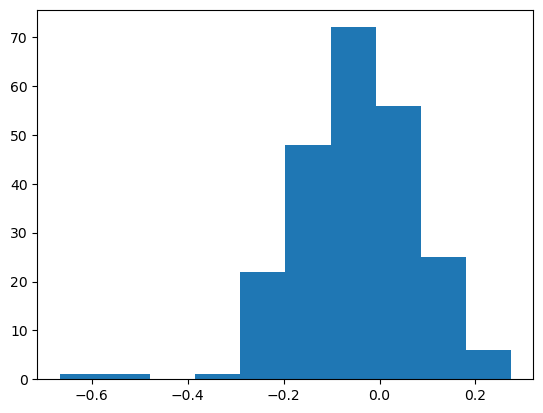

In [17]:
plt.hist(coma_merged.logdist_corr)
plt.show()

In [18]:
cosmo_2 = FlatLambdaCDM(H0=100. * u.km / u.s / u.Mpc, Om0=0.31)

In [19]:
d_6df = cosmo_2.comoving_distance(0.15)
d_6df

<Quantity 433.62216484 Mpc>

In [20]:
#dz_l = cosmo_2.angular_diameter_distance(coma_merged.zcmb).value
dz = cosmo_2.comoving_distance(coma_merged.zcmb).value
print (dz)
d_coma = 10**(np.log10(dz) - coma_merged.logdist)
print (d_coma)
mu = 5.*np.log10(d_coma)+25.
print (np.median(d_coma), "+/-",np.std(d_coma)/np.sqrt(len(d_coma)),"Mpc/h")
#print (np.median(10**(np.log10(dz_l) - coma_merged.logdist_corr)))
print (len(d_coma))
print (np.mean(mu))

[ 76.19827248  85.61651973  73.39948755  63.82434919  58.42851895
  68.89417081  68.56170405  78.8152163   73.91820972  65.74079912
  72.6707852   73.4914379   71.83466529  75.40894546  62.77640605
  73.10818213  74.412208    58.82366752  71.5035224   72.24347451
  59.16419743  71.4225862   74.80699794  58.44705361  62.62857458
  73.92031077  80.85084694  74.65994463  63.05974813  83.76727702
  68.08195572  65.99393783  65.20004293  57.19372611  77.96474106
  78.23806526  78.37288679  84.38008004  69.44449173  76.99711064
  72.97424658  87.40552834  62.96341574  49.86894749  60.52639194
  71.65055071  66.20437813  81.8809343   63.7673027   68.33596099
  77.40394365  77.86807916  63.24873917  56.5701256   75.8489929
  65.19725838  82.43081693  81.4867474   70.64649296  75.50309641
  71.2462886   61.80241932  66.63936366  72.34181078  75.34218837
  71.31355625  78.8551318   66.59408533  72.51353537  71.37029165
  62.6924062   81.54900528  67.01151403  75.55167307  70.21434552
  80.870848

In [21]:
print (d_coma, np.log(10) * d_coma * coma_merged.logdist_err_corr, 100.* np.log(10) * d_coma * coma_merged.logdist_err_corr/d_coma)

0       69.362117
1       56.014201
2       85.272222
3       97.203873
4       98.393142
          ...    
227     38.464298
228    152.529651
229    100.507178
230     82.939337
231    355.120312
Name: logdist, Length: 232, dtype: float64 0       16.113344
1       12.963104
2       19.852422
3       22.795267
4       23.187438
          ...    
227      9.617342
228     40.625666
229     29.064395
230     20.969610
231    140.324137
Length: 232, dtype: float64 0      23.230756
1      23.142531
2      23.281230
3      23.450986
4      23.566112
         ...    
227    25.003295
228    26.634602
229    28.917731
230    25.283069
231    39.514534
Length: 232, dtype: float64


In [22]:
print (np.log(10))

2.302585092994046


Calculates the weighted mean and the standard error of the weighted mean from a set of values and corresponding uncertainties:

I first define the sample data as two NumPy arrays: d_coma containing the values we want to average, and uncertainties containing the corresponding uncertainties for each value. We then calculate the weights for each value based on the inverse of the squared uncertainties, and use these weights to calculate the weighted mean using the formula:

wmean = Σ (w_i * x_i) / Σ w_i

where x_i is the ith value, w_i is the weight for the ith value, and Σ denotes the sum over all values.

Finally, we calculate the standard error of the weighted mean using the formula:

sem = sqrt( Σ (w_i * (x_i - wmean)^2) / ( Σ w_i ) / (n - 1) )

where n is the sample size. Note that we use n - 1 instead of n in the denominator to account for the fact that we have estimated the population variance from the sample data.

In [23]:
d_coma = d_coma  # values
uncertainties = np.log(10) * d_coma * coma_merged.logdist_err  # uncertainties

weights = 1 / uncertainties**2

wmean = np.sum(weights * d_coma) / np.sum(weights)

sem = np.sqrt(np.sum(weights * (d_coma - wmean)**2) / np.sum(weights) / (len(d_coma) - 1))
estdm = np.std(d_coma)/(np.sqrt(len(d_coma) - 1))
print("Weighted mean: {:.3f}".format(wmean))
print("Standard error of the weighted mean: {:.3f}".format(sem))
print(estdm)
DMPch = np.average(d_coma,weights=weights)
print (DMPch)
print ("Hudsonetal97", cosmo_2.comoving_distance(7200./c))
print (round(np.average(d_coma, weights=1./uncertainties**2),4),"+/-",round(np.std(d_coma)/np.sqrt(len(d_coma)),4))

Weighted mean: 70.783
Standard error of the weighted mean: 1.111
1.7608383112781305
70.78270653696087
Hudsonetal97 71.59607501982944 Mpc
70.7827 +/- 1.757


# Calculate Hubble constant Using Coma distances from SBF

In [24]:
coma_dist_FP = round(np.average(d_coma, weights=1./uncertainties**2),4) #Mpc/h
err_coma_dist_FP = round(np.std(d_coma)/np.sqrt(len(d_coma)),4)
coma_NGC4874_dist_SBF = 99.1 #Mpc ##https://ui.adsabs.harvard.edu/abs/2021ApJS..255...21J/abstract
err_coma_NGC4874_dist_SBF = 5.8
H0_measured = coma_dist_FP/coma_NGC4874_dist_SBF
H0_measured*100.
err_H0_measured = H0_measured*np.sqrt((err_coma_dist_FP/coma_dist_FP)**2 + (err_coma_NGC4874_dist_SBF/coma_NGC4874_dist_SBF)**2)
print (100.*H0_measured,'+/-',100.*err_H0_measured)
print(H0_measured,'+\-',err_H0_measured)

71.42552976791121 +/- 4.540739161989308
0.7142552976791121 +\- 0.04540739161989308


In [25]:
coma_NGC4881_dist_SBF = 102. #Mpc ##https://ui.adsabs.harvard.edu/abs/1997ApJ...483L..37T/abstract
err_coma_NGC4881_dist_SBF = 14.
H0_measured = coma_dist_FP/coma_NGC4881_dist_SBF
H0_measured*100.
err_H0_measured = H0_measured*np.sqrt((err_coma_dist_FP/coma_dist_FP)**2 + (err_coma_NGC4881_dist_SBF/coma_NGC4881_dist_SBF)**2)
print (100.*H0_measured,'+/-',100.*err_H0_measured)

69.39480392156864 +/- 9.679284694290766


**Calculate Hubble constant using TRGB**

In [26]:
mu_coma_trgb = 35.03 #https://ui.adsabs.harvard.edu/abs/1997ApJ...478...49S/abstract
err_mu_coma_trgb = 0.37 #https://ui.adsabs.harvard.edu/abs/1997ApJ...478...49S/abstract
d_trgb_Leo_Coma = 10.**((mu_coma_trgb-25.)/5.)
err_d_trgb_Leo_Coma = np.log(10)*err_mu_coma_trgb/mu_coma_trgb
H0_measured = coma_dist_FP/d_trgb_Leo_Coma
H0_measured*100.
err_H0_measured = H0_measured*np.sqrt((err_coma_dist_FP/coma_dist_FP)**2 + (err_d_trgb_Leo_Coma/d_trgb_Leo_Coma)**2)
print (100.*H0_measured,'+/-',100.*err_H0_measured)

69.81152494758825 +/- 1.7329739652672993


# Calculate Hubble constant using GCLF

In [27]:
d_GCLF_combined_coma = 10.**((34.90-25.)/5.) 
print (d_GCLF_combined_coma,coma_dist_FP/d_GCLF_combined_coma)

95.49925860214354 0.7411858587812246


# Calculate Hubble constant using NGC1600 SBF

In [28]:
dz_NGC1600 = cosmo_2.comoving_distance(0.0155121943317797)
#print (dz_NGC1600)
d_NGC1600_FP = 10**(np.log10(dz_NGC1600.value) - 0.09739370077368)
error_d_NGC1600_FP = np.log(10) * d_NGC1600_FP * 0.098178591798036  # uncertainties
#print (d_NGC1600,error_d_NGC1600)
d_NGC1600_sbf = 71.7
err_d_NGC1600_sbf = 2.7
H0_measured = d_NGC1600_FP/d_NGC1600_sbf
H0_measured*100.
err_H0_measured = H0_measured*np.sqrt((error_d_NGC1600_FP/d_NGC1600_FP)**2 + (err_d_NGC1600_sbf/d_NGC1600_sbf)**2)
print (100.*H0_measured,'+/-',100.*err_H0_measured)

51.64248270478523 +/- 11.835396713263298


# Calculate Hubble constant using NGC4839 SBF

In [29]:
dz_NGC4839 = cosmo_2.comoving_distance(0.0254518612146696)
d_NGC4839_FP = 10**(np.log10(dz_NGC4839.value) - 0.019930837194848)
error_d_NGC4839_FP = np.log(10) * d_NGC4839_FP * 0.0956712593603657  # uncertainties
d_NGC4839_sbf = 91.2
err_d_NGC4839_sbf = 4.
H0_measured = d_NGC4839_FP/d_NGC4839_sbf
H0_measured*100.
err_H0_measured = H0_measured*np.sqrt((error_d_NGC4839_FP/d_NGC4839_FP)**2 + (err_d_NGC4839_sbf/d_NGC4839_sbf)**2)
print (100.*H0_measured,'+/-',100.*err_H0_measured)
print (d_NGC4839_FP)

79.43723940571743 +/- 17.842793810404615
72.44676233801431


In [30]:
def weighted_avg_and_std(values, weights, axis=None):
    average = np.average(values, weights=weights, axis=axis)
    average_err = np.std(values)*np.sqrt(np.sum((weights/np.sum(weights))**2))
    variance = np.average((values-average)**2, weights=weights, axis=axis)
    return (average, average_err, np.sqrt(variance))

results = weighted_avg_and_std(d_coma, weights, axis=None)
print (results)
pv_weights = 1/coma_merged.pverr**2.
results_pv = weighted_avg_and_std(coma_merged.pv,pv_weights, axis=None)
print (results_pv)

(70.78270653696087, 1.9777849566785555, 16.88608851579909)
(-678.0735487144295, 136.6001429981529, 1845.848599308299)


In [31]:
d = d_coma
sd_d = uncertainties

# calculate uncertainty in mu
mu = 5 * np.log10(d) + 25
sd_mu = np.sqrt((5 / (d * np.log(10)))**2 * sd_d**2)

weights_mu = 1. / sd_mu**2.

results_mu = weighted_avg_and_std(mu, weights_mu, axis=None)
print (results_mu)


mu_t = 5. * np.log10(DMPch) + 25.
print (mu_t)

(34.430406525397416, 0.03635207762172955, 0.5192996072102549)
34.24963582425644


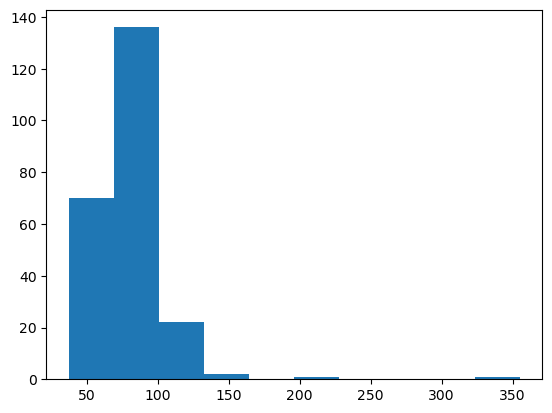

In [32]:
plt.hist(d_coma)
plt.show()

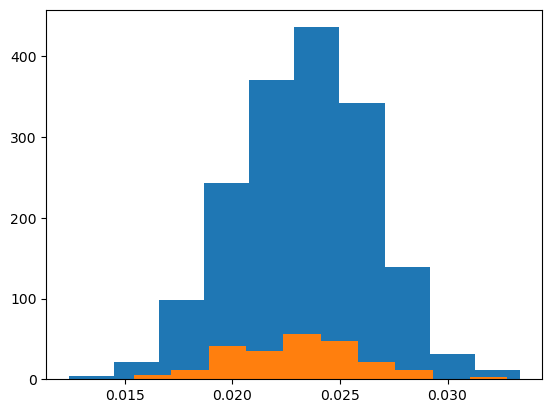

In [33]:
plt.hist(coma_desi.z)
plt.hist(coma_merged.z_x)
plt.show()

In [34]:
print (np.max(coma_merged.z_x))
print (np.min(coma_merged.z_x))

0.0327738865775751
0.0154318548936145


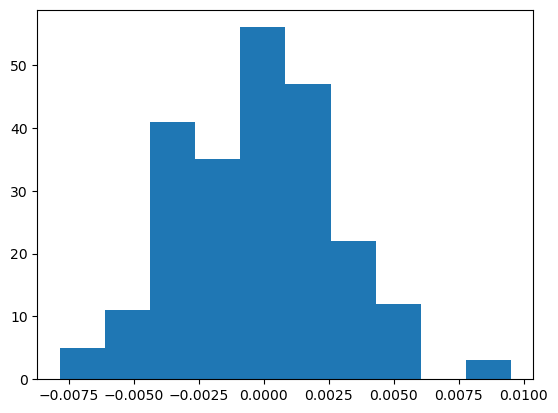

In [35]:
plt.hist(coma_merged.z_x-np.mean(coma_desi.z))
plt.show()

In [36]:
outliers = coma_merged.drop(coma_merged[coma_merged.z_x < 0.03276].index)

In [37]:
outliers.ppxf_sigma

225    70.706153
Name: ppxf_sigma, dtype: float64

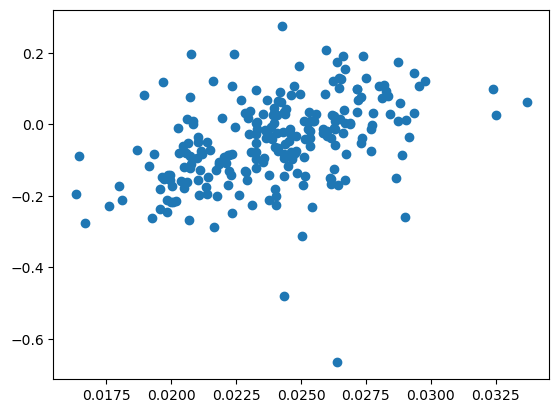

In [38]:
plt.scatter(coma_merged.zcmb,coma_merged.logdist_corr)
plt.show()

In [39]:
fitting_data = pd.read_csv("fp_fitting_data_fuji.csv", delimiter=' ')
fitting_data

,objid,r,s,i,dr,dr_ph,ds,di,Sprob,cz
0,3.962842e+16,0.043543,2.154577,2.945744,0.000095,0.016673,0.004325,0.000860,1.000000,7380.851869
1,3.963333e+16,-0.574830,2.093689,3.201045,0.000076,0.130353,0.003851,0.000493,0.075899,689.740560
2,3.962842e+16,0.761415,2.422567,2.548015,0.000045,0.014858,0.002484,0.000333,1.000000,8337.821434
3,3.962777e+16,0.323109,2.177125,2.413567,0.000182,0.013752,0.004492,0.001123,1.000000,8962.503400
4,3.963308e+16,0.305545,2.298011,2.740888,0.000105,0.032106,0.001769,0.000527,1.000000,3750.764392
...,...,...,...,...,...,...,...,...,...,...
3238,3.963324e+16,0.327094,1.835153,2.153517,0.000432,0.011308,0.035447,0.002659,0.927319,11160.939836
3239,3.962766e+16,0.544359,2.113498,2.262257,0.000092,0.010431,0.024009,0.000573,1.000000,12604.672182
3240,3.962760e+16,0.297660,2.025392,2.543424,0.000135,0.011149,0.030752,0.000610,1.000000,11780.556671
3241,3.963326e+16,0.577149,1.940012,2.326531,0.000278,0.007338,0.035426,0.002633,1.000000,17396.165873


In [40]:
#coma_merged = pd.merge(coma_merged, fitting_data, left_on='targetid_1', right_on='objid')

In [41]:
print (coma_merged.zcmb)
print (np.round(np.max(coma_merged.zcmb),3))
print (np.round(np.min(coma_merged.zcmb),3))

0      0.025570
1      0.028752
2      0.024625
3      0.021396
4      0.019579
         ...   
227    0.020769
228    0.029011
229    0.021750
230    0.019956
231    0.026371
Name: zcmb, Length: 232, dtype: float64
0.034
0.016


In [42]:
# arc_to_kpc = cosmo.arcsec_per_kpc_proper(coma_merged.zcmb)
# R_e = coma_merged.circ_radius/arc_to_kpc.value
# gr = coma_merged.mag_g - coma_merged.mag_r_corrected
# kcorr_r = calc_kcor('r', coma_merged.z_1, 'g - r', gr)
# AbsMag = coma_merged.mag_r_corrected - 5.0*(np.log10(cosmo.comoving_distance(coma_merged.zcmb))) - 25.0
# Mu_e = coma_merged.mag_r_corrected + (0.85*coma_merged.zcmb) + 2.5*np.log10(2*np.pi*(coma_merged.circ_radius**2.0)) - 2.5*np.log10((coma_merged.zcmb+1)**4.0) - kcorr_r
# logI_e = ( (0.4*4.65) - (0.4*Mu_e) + (2.0*np.log10(206265.0/10.0)))
# logR_e = np.log10(R_e)

# theta_ap = 0.75
# theta = coma_merged.circ_radius
# logS = np.log10((coma_merged.ppxf_sigma) * (theta/8.0/theta_ap)**(-0.04))

# #logS = np.log10(coma_merged.ppxf_sigma)
# r_desi = logR_e
# s_desi = logS
# i_desi = logI_e
# # dr = coma_merged.dr
# # ds = coma_merged.ds
# # di = coma_merged.di

In [43]:
# a = 1.15193454; b = -0.80122543
# mean_r = 0.22581434; mean_s = 2.1734096; mean_i = 2.68181427
# sigma1 = 0.05665097; sigma2 = 0.37865873; sigma3 = 0.21446484
# c = mean_r - a*mean_s - b*mean_i
# XFP_F_desi = (a*s_desi)+(b*i_desi)+c
# #dxfp = np.sqrt((ds*ds)+(di*di))

In [44]:
# xfit = np.linspace(-0.5, 1.0)
# sfit = np.linspace(1.5,3.0)
# ifit = np.linspace(0.8,4.5)
# fig, ax = plt.subplots(figsize=(8, 5))
# ax.set_xlim(-0.4,1.0)
# ax.set_ylim(-0.4,1.0)
# ax.scatter(XFP_F_desi, r_desi,color='black',edgecolor='none')#,s=3.5)
# #ax.errorbar(XFP_F_desi,r_desi,xerr=dxfp,yerr=dr,fmt=".k",alpha=0.1)
# ax.plot(xfit,xfit,c='black')
# plt.legend(framealpha=0.0)
# ax.grid(b=True, which='both', color='0.65',linestyle=':')
# ax.set_xlabel(r'$a \/\log_{10} \sigma + b\/ \log_{10} I_e + c$ [$h^{-1}$ kpc]')
# ax.set_ylabel(r'$\log_{10} R_e$ [$h^{-1}$ kpc]')
# plt.tight_layout()
# plt.savefig('FP_Coma.png', transparent=True)
# plt.savefig('FP_Coma.pdf')
# plt.show()

In [45]:
# sns.set_style("ticks")
# x = XFP_F_desi
# y = r_desi
# data = np.column_stack((x,y))
# df = pd.DataFrame(data, columns=["x", "y"])

# g = sns.JointGrid(x="x", y="y", data=df, space=-5.)
# g = g.plot_joint(plt.scatter, s=10, edgecolor="None")
# g = g.set_axis_labels(xlabel=r'DESI', ylabel=r'SDSS', fontsize = 16)
# g = g.plot_joint(sns.kdeplot, zorder=10, levels=7)
# g = g.plot_marginals(sns.kdeplot, shade=True)
# sns.regplot(x=x, y=y, ci=None, line_kws={"color":"b","alpha":0.5,"lw":2})#g = g.ax_joint.axhline(y=0.0,linestyle='--')
# plt.xlim(-0.5,1.0)
# plt.ylim(-0.5,1.0)
# #g = sns.set(font_scale = 1.5)
# #g = g.ax_marg_y.axhline(y=0.0)
# plt.tick_params(axis="both", labelsize=16)
# plt.tight_layout()
# #plt.savefig('pv_method_1_vs_2_double_hist.png')
# #plt.savefig('pv_method_1_vs_2_double_hist.pdf')
# plt.show()

In [46]:
cosmo_2 = FlatLambdaCDM(H0=75. * u.km / u.s / u.Mpc, Om0=0.31)
x001 = cosmo_2.comoving_distance(4003./c)
x001

<Quantity 53.20719879 Mpc>

In [47]:
c = 299792.458
5088./c

0.016971741163681976

In [48]:
c*(1./(2.358*2500.))

50.85537879558948

In [49]:
153.27/65.

2.358

In [50]:
np.log(10)

2.302585092994046

In [51]:
25364.42/1500.

16.909613333333333

In [52]:
np.sqrt(2.*np.log(10))

2.145966026289347